# Group 1 Project 2 Data Analytics Group Project

In the first group project, Group 1 analyzed a set of tropical storm data from the Atlantic ocean, northern hemisphere, and measured the frequency of those storms over a 160-year timeframe.  This data revealed a significant increase in storm activity toward the end of the 20th century and increased markedly into the 21st century.  Our initial group project concluded expressing a need for further exploration of existing data to determine what may be causing this phenomena.  This project will be an attempt to begin exploring possible answers.  In particular our analysis will focus on the following questions:

1 **Is there an underlying cause that might be causing the increased storm activity?**  
2 **Does an available dataset exist that can objectively quantify this underlying cause?**  
3 **Can this dataset be converted to a time series component to compare with our storm activity dataset?**  
4 **What sort of joint probabilities exist between the two datasets?**  
5 **Do the comparison graphs between the two datasets suggest a correlation?**  
6 **How does a mean comparison of the two datsets impact this visualization?**  
7 **What are the correlation coefficients of the data and do these change for different time periods?**  
8 **Does a density estimate of the underlying data provide clarity to the analysis?**  

The following analysis is the attempt of Group 1 to answer some of these questions:

In [1]:

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

# Extra imports
from datetime import datetime



## 1. Identifying Potential Underlying Factors

In searching for potential underlying causes that may contribute to increased storm activity for the last 20 years, our team discovered a variety of research conducted by the Met Office Hadley Center https://www.metoffice.gov.uk/hadobs/index.html that provided some very interesting observations. The data maintained by the center provides average ocean temperature variations by month from the 1850’s to the present (which is exactly the timeframe we used for our storm analysis). Anomalies are compared to the 1961 – 1990 averages. https://www.metoffice.gov.uk/hadobs/monitoring/index.html


## 2. Does an Available Dataset Exist that can Objectively Quantify this Underlying Cause?

First, we use the previous Excel worksheet that contained the data we used in our first group project to plot the number of storm occurances.  

Second, we transferred over the data from the Met Office Hadley Center to an Excel worksheet so that we can import that information into our Jupyter notebook as well. 

In this section we import our previous dataset (listing of storm activity) and our new dataset (ocean temperature data).


In [2]:
#Import data from the Excel files
otemppath = ('Ocean Temp Data.xlsx')
stormpath = ('Group1 Project1 Hurricane Dataset.xlsx')

otempxl = pd.read_excel(otemppath)
stormxl = pd.read_excel(stormpath)

#print(otempxl.head(5))
#print(stormxl.head(5))

##  3.  Can this Dataset be Converted to a Time Series Component to Compare with our Storm Activity Dataset?

First, we will need to create a Tropical Storm dataframe.

Note: In our previous project, we calculated that although the **NUMBER** of Hurricanes and Major Hurricanes also increased from 1990 - 2010 the **RATIO** of Hurricanes and Major Hurricanes to Tropical Storms were very similar to previous decades and the entire dataset timeframe. Since this proportionality exists, we are only going to study Tropical Storm occurances in this analysis. The reason for this is that 1) Tropical Storms is the largest numerical category in the dataset and 2) Hurricanes and Major Hurricanes are only an intensification of Tropical Storms.

We will assume that any conclusions that result in regard to Tropical Storms will also apply to Hurricanes and Major Hurricanes as well.

We create the Tropical Storm dataframe in this section.

In [3]:
#This creates the tropical storm dataframe
trpstm = stormxl[['Year', 'Storm', 'Number', 'Month', 'StormClass']]
trpstm = trpstm[trpstm['StormClass'] == 'Tropical Storm']
tstorm = trpstm.drop_duplicates(['Year', 'Storm', 'Number'])
#print(tstorm.head(5))
#print(tstorm.shape)


### Converting Dataframes to a Timedate Index

Our first challenge was that both our original dataset and our new dataset both list the data by year and month.  In order to provide analysis of the data by date, we had to convert this information into a datetime format.

In this section we convert the year, month and a substitute day for each row and put this value into column 'TS'
We also eliminate some data from the Hadley Center data so that the timeframes match for both datasets.  Finally, we make column 'TS' (the datetime formatted values) be the index for each dataset.

In [4]:
#This is where we create a timestamp column
import calendar
monthnum = dict((v,k) for k,v in enumerate(calendar.month_name))

tstorm.Month = tstorm.Month.map(monthnum)
tstorm['Day'] = 10
tstorm['TS'] = pd.to_datetime(tstorm[['Year','Month','Day']])

otemp = otempxl
otemp['Year'] = otemp.Date.str[:4]
otemp['Year'] = pd.to_numeric(otemp['Year'])
otemp['Month'] = otemp.Date.str[5:7]
otemp['Month'] = pd.to_numeric(otemp['Month'])
otemp['Day'] = 10
otemp['TS'] = pd.to_datetime(otemp[['Year','Month','Day']])

#This deletes any data prior to 1851 and after 2010 (which is the timeframe for Hurricane dataset)
otemp = otemp[otemp['Year'] > 1850]
otemp = otemp[otemp['Year'] < 2011]


#Now we set the timestamp column as the index
tstorm.index = pd.DatetimeIndex(tstorm.TS)
otemp.index = pd.DatetimeIndex(otemp.TS)
                                   
#print(tstorm.head(5))
#print(otemp.head(5))


### First Time Series Plot

Since we now have both dataframes indexed by a datetime value, we now create our first plot using the new data.

This section creates that plot.


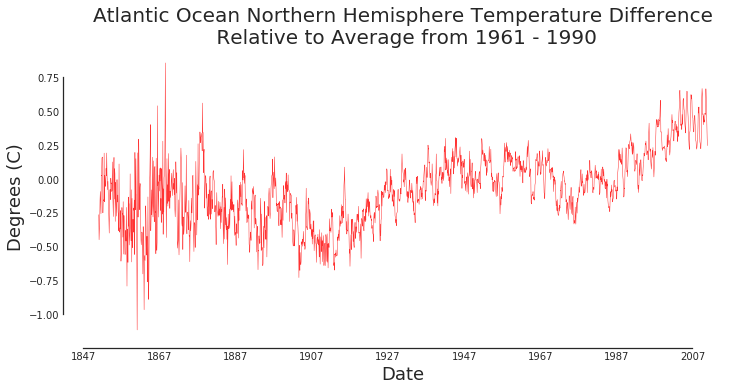

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

otemp.TempDiff.plot(lw=0.5, alpha=0.8, color = 'r')

ax.set(title='Atlantic Ocean Northern Hemisphere Temperature Difference\n Relative to Average from 1961 - 1990',
      xlabel='Date', ylabel = 'Degrees (C)')

sns.despine(offset=5, trim=True)

### Combining Data Frames

In order to get the data in a format where we can do comparative analysis, we need to get count of storms for each period of time (in this case month) so that we can compare the frequency of storms with the temperature variation by month.

In this section we use pivot tables and merge function to combine number of storms and average temperature into the same row within a single dataframe.

In [6]:
#Setting up the Pivot Table

tstormcount = pd.Series.to_frame(tstorm.groupby(['TS'])['StormClass'].count())

tstormptable = tstorm.pivot_table(index='TS')
                        

#print(tstormptable.head(5))


tstormotemp = otemp.drop(otemp.columns[[0, 2, 3, 4]], axis=1)

#print(tstormotemp.head(5))

tstormdat = tstormptable.merge(tstormotemp, left_index=True, right_on='TS')
tstormdat = tstormdat.merge(tstormcount, left_index=True, right_on='TS')

#print(tstormdat.head(5))

## 4.  What sort of joint probabilities exist between the two datasets?

Now that we have a combined dataset that lists number of storms and average ocean temperature by month we are ready to conduct our first analysis of the data.

For our first look at correlation, our team chose to do a joint probablity test comparing number of storms in a given month with the temperature deviation from average for that month.  In our first analysis we looked at the entire dataset 1851 - 2010.  Our team was curious if, given an average ocean temperature higher than normal, this correlated to an increased number of storms.  In order to do this analysis, we created a heat map that plotted the number storms compared to the average ocean temperature variation.  The results are as follows.

In the next two sections is the code we used to generate this heatmap.

In [7]:
xb = np.arange(3, 51, 1)
yb = np.arange(1, 11, 1)

tdata, xedges, yedges = np.histogram2d(tstormdat.TempDiff, tstormdat.StormClass, bins=[60, 15])
tdata /= np.sum(tdata)

xe, ye = np.meshgrid(xedges, yedges)

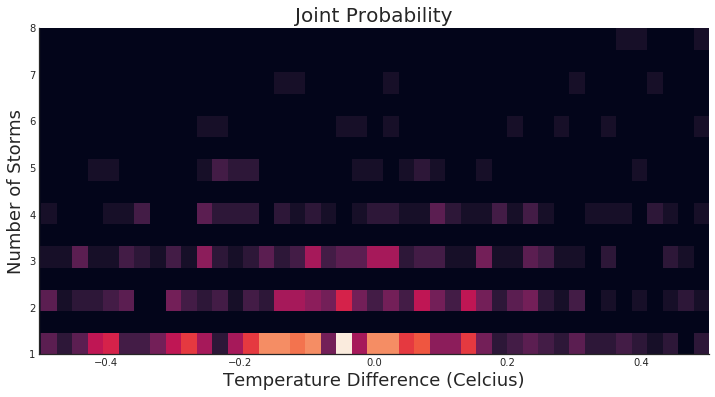

In [8]:
from matplotlib.patches import Circle

# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))

# We make our own heatmap, rather than use Seaborn's heatmap, since we
# have a non-standard case here. Set equal aspect so we get square pixels.
ax.pcolormesh(xe, ye, tdata.T)

# Set labels and titles
ax.set_xlabel('Temperature Difference (Celcius)', fontsize=18)
ax.set_ylabel('Number of Storms', fontsize=18)
ax.set_title('Joint Probability', fontsize=20)

# Set x limits, ticks, and tick labels
ax.set_xlim(-0.5, 0.5)


# Clean-up plot
sns.despine(trim=False)



## First Joint Probablity Visualization

The result of this plot was actually quite surprising to us.  The number of storms compared to temperature difference does not show any marked skew toward the positive side of the temperature variations or the negative side.  For the temperatures that saw multiple numbers of storms, these tended to skew a bit to the positive side but may be inconclusive within the standard deviation of our data.  In addition, at first sight the data really looks like a standard normal distribution.

Since the amount of storm occurrence has increased markedly since 1990 our team thought maybe a joint probability analysis for these years would provide some insight into our hypothesis.  Filtering out all data previous to 1991 reveals the following plot.

The following three sections are the code we used to generate this plot.

In [9]:
#Calculate the mean ocean temperature of storms
tstormdat['WgtAvg'] = tstormdat['StormClass'] * tstormdat['TempDiff']

#print(tstormdat.head(5))

tstormtempavg = tstormdat['WgtAvg'].sum() / tstormdat['StormClass'].sum()

#print(tstormtempavg)

tsc = pd.pivot_table(tstormdat,index=['Year'],values=['StormClass'], aggfunc = [np.sum])
#print(tsc.tail(5))

In [10]:
# Look at data since the 1961 - 1990 period
tstormpost = tstormdat[tstormdat['Year'] > 1990]

#print(tstormpost.head(5))

tdata, xedges, yedges = np.histogram2d(tstormpost.TempDiff, tstormpost.StormClass, bins=[60, 15])
tdata /= np.sum(tdata)

xe, ye = np.meshgrid(xedges, yedges)

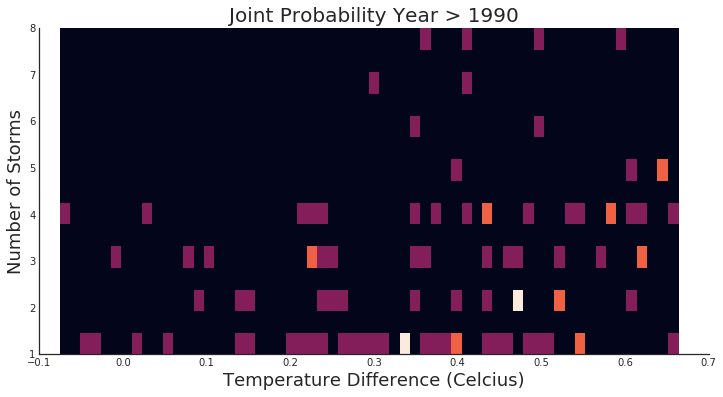

In [11]:
# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))

# We make our own heatmap, rather than use Seaborn's heatmap, since we
# have a non-standard case here. Set equal aspect so we get square pixels.
ax.pcolormesh(xe, ye, tdata.T)


# Set labels and titles
ax.set_xlabel('Temperature Difference (Celcius)', fontsize=18)
ax.set_ylabel('Number of Storms', fontsize=18)
ax.set_title('Joint Probability Year > 1990', fontsize=20)

# Set x limits, ticks, and tick labels
ax.set_xlim(-0.1, 0.7)


# Clean-up plot
sns.despine(trim=False)


## Second Joint Probability Visualization

This is a markedly different heatmap then our first one.  This shows a much more powerful correlation to storm activity as the average ocean temperature increases.  We still needed a better analysis in order to clarify our hypothesis.

## 5.  Do the Comparison Graphs Between the two Datasets Suggest a Correlation?

Our team next decided that a side by side comparison of the two time series datasets might give us a good clue as to where to take our hypothesis next.  We still felt there was a good potential of correlation between our two datasets, but we needed better visualizations.

In the next two sections of code we create the two plots on one chart using two different y-axis for the same time series:

In [12]:
#This builds a dictionary with the year as key and the number of storms as value
stormcount = {}
for idx, row in tsc.iterrows():
    styr = idx
    stcnt = row[0]
    yearadd = {styr:stcnt}
    stormcount.update(yearadd)

#This builds a dictionary with the year as key and the average ocean temp during storm as value
stormtemp = {}
stormbeg = 1851
cntr = 0
temp = 0
for index, row in tstormdat.iterrows():
    if row['Year'] <= stormbeg:
        cntr = cntr + row['StormClass']
        temp = temp + (row['TempDiff'] * row['StormClass'])
    else:
        if cntr == 0:
            tempadd = {stormbeg:0}
            stormtemp.update(tempadd)
            stormbeg = stormbeg + 1
            temp = 0
            cntr = 0
        else:
            avgtemp = round(temp/cntr,2)
            tempadd = {stormbeg:avgtemp}
            stormtemp.update(tempadd)
            stormbeg = stormbeg + 1
            temp = 0
            cntr = 0
            
avgtemp = round(temp/cntr,2)        
tempadd = {stormbeg:avgtemp}
stormtemp.update(tempadd)  


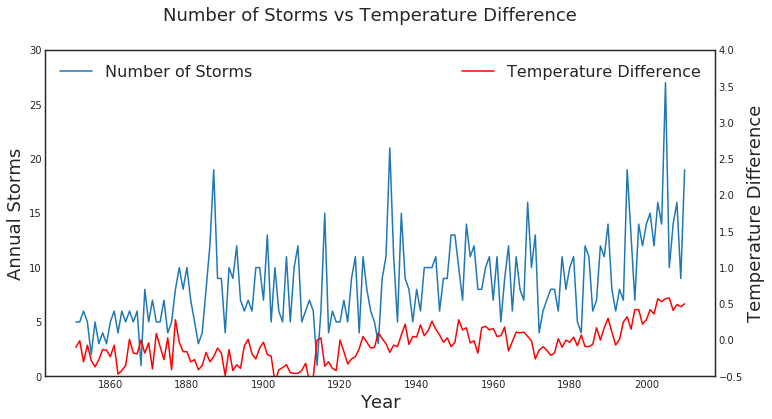

In [13]:

fig, ax1 = plt.subplots(figsize=(12, 6))

keys = stormcount.keys()
valstorms = stormcount.values()
valtemps = stormtemp.values()

ax1.plot(keys, valstorms, label="Number of Storms")
ax1.set_xlabel ('Year')
ax1.set_ylabel ('Annual Storms')
ax1.set_ylim(0,30)


ax2 = ax1.twinx()

ax2.plot(keys, valtemps, label="Temperature Difference", color = 'r')
ax2.set_ylabel ('Temperature Difference')
ax2.set_ylim(-0.5,4)


#plt.xticks(list(keys))
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend(loc='upper right')

fig.suptitle('Number of Storms vs Temperature Difference', fontsize = 18)

plt.show()


### First Comparison Graph

This is a good visualization of what is happening over the 160 years for Tropical Storm count and average ocearn temperature variations.  It is easy to see a rising trend for both plots.  This was encouraging for our team.  What we didn't like was the amount of noise coming through this plot.  There is a tremendous amount of variation, and the data points are all **YEARLY** values so we expected a little smoother comparison.

## 6.  How does a Mean Comparison of the two Datsets Impact this Visualization?

For our next comparison graph, we wanted to see if we could reduce some of the noise from our first chart.  We decided on a rolling average of 10 years to see if this would provide any additional insights.  

The next section of code creates a line representing the rolling 10 year mean average for both lines.

Text(0.5,0.98,'Number of Storms vs Temperature Difference \n Rolling 10 Year Average')

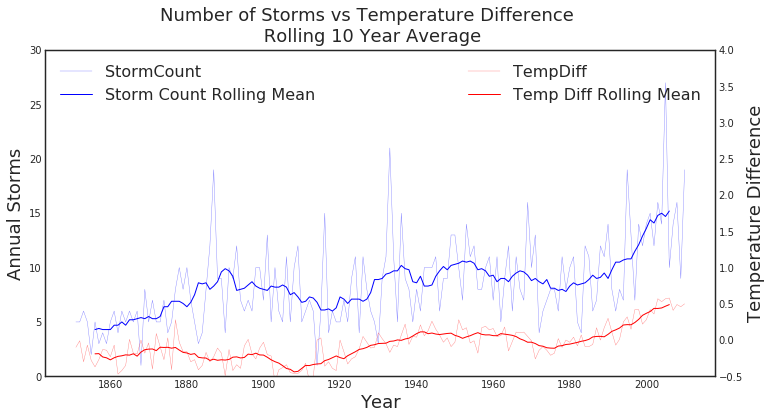

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))
from pandas.core.frame import DataFrame

#Create the dataframes for stormcount and tempdiff
S = pd.DataFrame.from_dict(stormcount, orient='index').reset_index()
S.columns = ['Year', 'StormCount']
S.set_index('Year', inplace=True)
T = pd.DataFrame.from_dict(stormtemp, orient='index').reset_index()
T.columns = ['Year', 'TempDiff']
T.set_index('Year', inplace=True)

#Create the dataframes for rolling stormcount and tempdiff
rollYear = 10 # WINDOW OF TIME
roll_S = S.rolling(rollYear, center = True) 
mnS = roll_S.mean()
roll_T = T.rolling(rollYear, center = True)
mnT = roll_T.mean()

#Plot the graphs
ax1 = S.StormCount.plot(lw=0.4, color = 'b', alpha = 0.5)
ax3 = mnS.StormCount.plot(lw=1, color = 'b', label='Storm Count Rolling Mean')
ax1.set_ylim(0,30)
ax1.set_xlabel ('Year')
ax1.set_ylabel ('Annual Storms')

ax2 = ax1.twinx()
ax2.yaxis.set_label_position("right")

ax2 = T.TempDiff.plot(lw=0.4, color = 'r', alpha = 0.5)
ax4 = mnT.TempDiff.plot(lw=1, color = 'r', label='Temp Diff Rolling Mean')
ax2.set_ylim(-0.5,4)
ax2.set_ylabel ('Temperature Difference')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


fig.suptitle('Number of Storms vs Temperature Difference \n Rolling 10 Year Average', fontsize = 18)



### Second Comparison Graph

This is a much better visual comparison graph from the first.  By reducing some of the noise, a clear correlation appears between number of storms and average ocean temperature.  Our team was very excited about this representation of our data.  


## 7.  What are the correlation coefficients of the data and do these change for different time period?

Next, we thought calculating a couple of correlation coefficient values would be helpful to provide an additional analytical component to the visual component we had just created.  For the first correlation coefficient, we used the entire dataset (1851- 2010).  The results are below.

In the following section we use the numpy corrcoef function to calculate this value.


In [15]:
tempcorr = np.corrcoef(
    [stormcount.get(x, 0) for x in keys],
    [stormtemp.get(x, 0) for x in keys])[0, 1]

print(f'The Correlation Coefficient of StormCount vs TempDiff from 1851 - 2010 is {tempcorr.round(3)}')


The Correlation Coefficient of StormCount vs TempDiff from 1851 - 2010 is 0.431


### First Correlation Coefficient of Data

Since the corrleation coefficient is greater than zero, it indicates a positive correlation, and since it is near 0.5 it can be considered a moderate correlation.  This affirmed our visual interpretation, but we were a little surprised that it was not stronger.  Looking at both graphs it appeared this would be a value closer to 1.0 (perfect correlation).  
 

### Evaluating Data Only from 1990 - 2010 

Since the storms have increased since 1990, we thought our next correlation coefficient should be just this data.

In the following section we will look at some additional code from 1991 - 2010 to see how filtering for the years impacts our visualization and our correlation coefficients.

The next two sections of code produce a similar comparison graph as ealier, only for the above filtered dates.

In [16]:
#We will use the tstormpost dataset again, for only those years > 1990

#This builds a dictionary with the year as key and the number of storms as value
stormcount = {}
stormbeg = 1992
cntr = 0
for index, row in tstormpost.iterrows():
    if row['Year'] <= stormbeg:
        cntr = cntr + row['StormClass']       
    else:
        yearadd = {stormbeg-1:cntr}
        stormcount.update(yearadd)
        stormbeg = stormbeg + 1
        cntr = 0
yearadd = {stormbeg:cntr}
stormcount.update(yearadd)  

print(stormcount)

#This builds a dictionary with the year as key and the average ocean temp during storm as value
stormtemp = {}
stormbeg = 1992
cntr = 0
temp = 0
for index, row in tstormpost.iterrows():
    if row['Year'] <= stormbeg:
        cntr = cntr + row['StormClass']
        temp = temp + (row['TempDiff'] * row['StormClass'])
    else:
        if cntr == 0:
            tempadd = {stormbeg-1:0}
            stormtemp.update(tempadd)
            stormbeg = stormbeg + 1
            temp = 0
            cntr = 0
        else:
            avgtemp = round(temp/cntr,2)
            tempadd = {stormbeg-1:avgtemp}
            stormtemp.update(tempadd)
            stormbeg = stormbeg + 1
            temp = 0
            cntr = 0
            
avgtemp = round(temp/cntr,2)        
tempadd = {stormbeg:avgtemp}
stormtemp.update(tempadd)  

print(stormtemp)

{1991: 14, 1992: 7, 1993: 6, 1994: 18, 1995: 12, 1996: 3, 1997: 13, 1998: 11, 1999: 10, 2000: 14, 2001: 11, 2002: 15, 2003: 6, 2004: 25, 2005: 9, 2006: 13, 2007: 15, 2008: 5, 2010: 18}
{1991: 0.05, 1992: 0.01, 1993: 0.25, 1994: 0.32, 1995: 0.15, 1996: 0.42, 1997: 0.42, 1998: 0.22, 1999: 0.28, 2000: 0.42, 2001: 0.36, 2002: 0.57, 2003: 0.53, 2004: 0.57, 2005: 0.58, 2006: 0.41, 2007: 0.49, 2008: 0.46, 2010: 0.5}


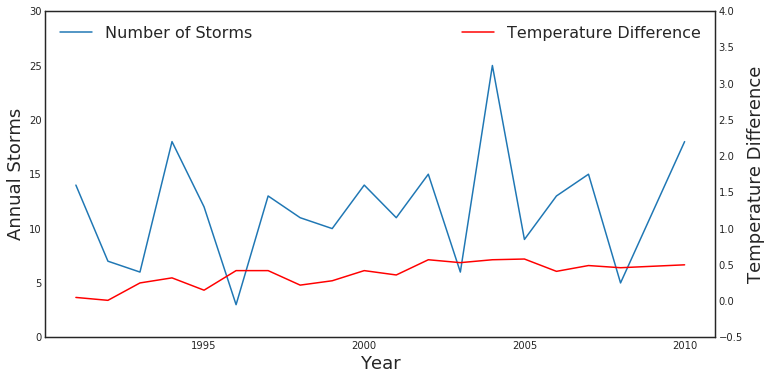

In [17]:

fig, ax1 = plt.subplots(figsize=(12, 6))

keys = stormcount.keys()
valstorms = stormcount.values()
valtemps = stormtemp.values()

ax1.plot(keys, valstorms, label="Number of Storms")
ax1.set_xlabel ('Year')
ax1.set_ylabel ('Annual Storms')
ax1.set_ylim(0,30)
ax1.set_xticks([1995,2000,2005,2010])


ax2 = ax1.twinx()

ax2.plot(keys, valtemps, label="Temperature Difference", color = 'r')
ax2.set_ylabel ('Temperature Difference')
ax2.set_ylim(-0.5,4)


#plt.xticks(list(keys))
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend(loc='upper right')

plt.show()

### Second Comparison Graph

Unfortunately, this second graph is more jagged then the first, and the correlation does not appear to be visually near as strong as the previous comparison graph.

In [18]:
tempcorr90 = np.corrcoef(
    [stormcount.get(x, 0) for x in keys],
    [stormtemp.get(x, 0) for x in keys])[0, 1]

print(f'The Correlation Coefficient of StormCount vs TempDiff from 1991 - 2010 is {tempcorr90.round(3)}')

The Correlation Coefficient of StormCount vs TempDiff from 1991 - 2010 is 0.23


### Second Correlation Coefficient of Data

This seemed a step back from our hypothesis.  As is indicated, the correlation of storms to ocean temperature is less when looking at the last 20 years, even though the frequency of the storms have increased substantially over this period of time.  We knew that the average ocean temperature had increased since 1990.  Why was there a stronger correlation between the entire dataset then for the dataset filtered by only these years?  Our team knew we had to conduct another analysis. 

## 8.  Does a Density Estimate of the Underlying Data Provide Clarity to the Analysis?

Let's now consider some Kernel Density Estimations to see if this analysis can bring any addtional light into our project.  Since the frequency of storms is greater when the ocean temperature is warmer, we felt this could give us some good insight.

In our first plot we thought we would conduct just a simple kernel density analysis to see if it would help us.

The code below is that simple analysis

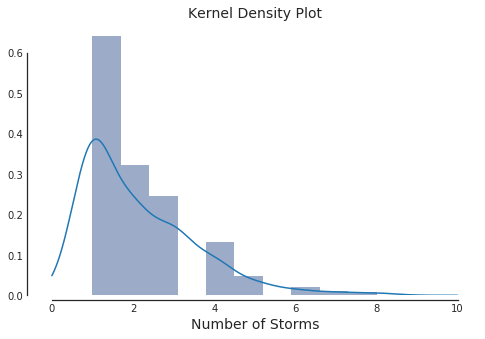

In [19]:
# First we import what we need
from sklearn.neighbors import KernelDensity

# Gaussian KDE with Seaborn bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)

# Grab the data, and compute the support (sampling points)
x = tstormdat['StormClass']
#print(x.head(5))
support = np.linspace(0, 10, len(x))

# Create the KDE, and return the support values.
kde.fit(x[:, np.newaxis])
y = kde.score_samples(support[:, np.newaxis])

# Plot the results including underlying histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True)
ax.plot(support, np.exp(y))
plt.xlabel('Number of Storms', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)

### First Kernel Density Plot

In this format, we really can't tell anything in regard to our data, so let's change to a jointplot using the kde.

In the next code section we plot a kernel density estimate jointplot

Text(0,1,'Storms 1851 - 2010')

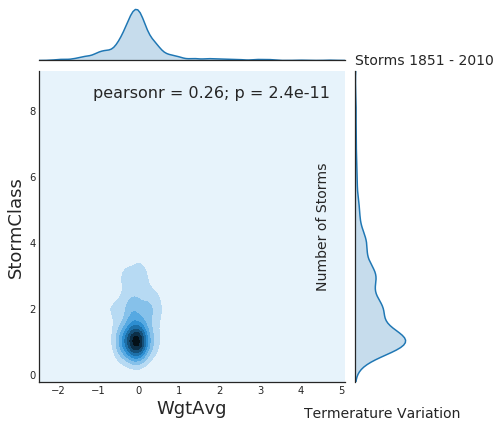

In [20]:
ax = sns.jointplot(x='WgtAvg', y='StormClass', data=tstormdat, kind='kde')
plt.xlabel('Termerature Variation', fontsize=14, labelpad = 25)
plt.ylabel('Number of Storms', fontsize=14, labelpad = 25)
plt.title('Storms 1851 - 2010', fontsize=14, loc = 'left')

### Second Kernel Density Plot
This is the represenation of all tropical storms since 1851. It is very to easy to see in this Kernel Density Estimation that the number of storms over the last 160 years have clustered around the mean temperature average (based on average temperature from 1961 - 1990) with variations contained in the plus or minus one degree celcius. The Pearson value suggests a positive correlation, but a weak correlation.

We, again, were very concerned about this visualization.  Looking at the entire dataset visually showed very little correlation and the Pearson value using this analysis was positive, but lower than some of our previous calculations.  We then decided to again look at the data from 1991 - 2010.

The following code section filters our dataset for these dates.

Text(0,1,'Storms 1991 - 2010')

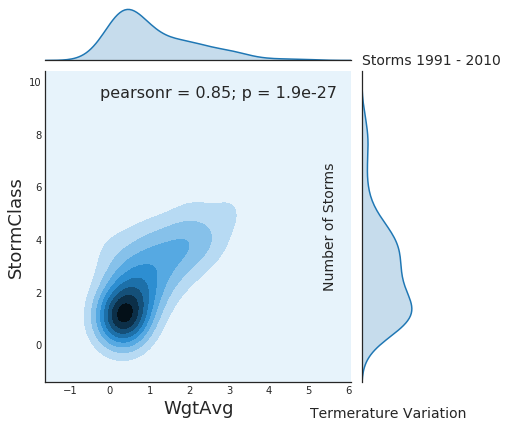

In [21]:
ax = sns.jointplot(x='WgtAvg', y='StormClass', data=tstormpost, kind='kde')
plt.xlabel('Termerature Variation', fontsize=14, labelpad = 25)
plt.ylabel('Number of Storms', fontsize=14, labelpad = 25)
plt.title('Storms 1991 - 2010', fontsize=14, loc = 'left')

### Third Kernel Density Plot

This is the representation of all tropical storms since 1991. A very significant skew toward the right (warmer ocean temperature) is easily visible in this graph. This is another reasonably conclusive data representation of the frequency of storms being linked to increased ocean temperatures. As you can also see, the Pearson value increased to 0.85, much closer to the perfect correlation value of 1.00.


## Conclusion

Our group felt this was a very informative on a variety of different fronts:

1  **Data is available from a wide variety of sources** Our team really had no difficulty in coming up with a quality dataset to use in helping us determine what might be causing an increase in storm activity.  We were very pleasantly surprised in searching for an alternate dataset how easy it was to find, and how easily accessible the actual data was.  The fact that it was even in the same timeframe as our original set was an even greater bonus!  

2  **Using different analysis tools can give contradictory insights** It was surprising to us while trying to prove our hypothesis how many times the data took us down contrasting paths.  Our first joint probability analysis (of the entire dataset) showed no skew or correlation at all.  Our second joint probability analysis (filtered for 1991 - 2010 data) did show a skew and correlation.  

3  **Applying different mathematical functions on data can give clearer insights** When we first looked at comparison graphs we could see general trends to support our hypothesis but there was a lot of noise in the data.  By using the mean of a 10 year rolling average we were able to see much clearer the general direction of both the storm frequency data and the ocean temperature variance increase.  

4  **Using numerical values helps support visual representations**  After we visualized the rolling 10 year average we felt we had an extremely positive correlation between storm frequency and ocean temperature.  However, when we calculated the correlation coefficient of the data it only came in at 0.431.  We were happy it was positive, even moderately positive, we just felt that as clear as the visualization was it should be much closer to 1.0.  This proved to us that visual plus numerical analysis must be used together to provide the greatest perspectives.  

5  **Filtering data can provide very different insights**  In our second conclusion point, we highlighted how filtering data helped us, in the comparison graphs the filtering of data hurt our hypothesis.  Where we presented a clear visual and moderate numerical correlation for the comparative graph on the entire dataset, filtering the data (1991 - 2010) provided just the opposite.  There was no clear visual correlation and the numerical analysis also decreased from 0.431 to 0.230.  

6  **Selecting the correct visualization tool can make all the difference**  After all of our analysis, the kernel density estimation turned out to be our best tool.  In our first KDE analysis, it didn't reveal much because there was so much data in our dataset (over 1,400 storms over 160 years) that any outliers were drowned out by the total volume of the data set.  It was only after filtering the data (again 1991 - 2010) that a clear correlation was revealed.  In hindsight, it makes sense that because we were investigating why the occurance of something (in this case storms) increased, a density visualization would the most insightful.  

### Final Thoughts

As data scientists we must use all the tools available in order to arrive at correct conclusions for ourselves and those we serve.  To the extent this is true, then gaining access to and proficiency over as many tools as possible will continue to be the goal.  This exercise showed how important looking at data from many angles helps in arriving at proper insight.

Respectively submitted, Watson, Sean, Nan, Dale and Joe.
